## The expressivness of halo

## Meter popularity

What if the "semantic halo" is just a mere function of a meter's popularity? In wide-spread meters (Iamb-4) it's simply more probable to sample any topic, while in rare meters there is just not enough space for expression of diverse themes. If we look at it this way, the "semantic halo" could be an effect of sampling error + confirmation bias. Let's test this.

1) We definetly expect that the distinctivness of semantic halo will fall with the increase of amount of poems in this meter  
2) If semantic halo is **just** an effect of meter's size this fall would be indistinguishable from a random sampling any n poems (disregard meter label)  
3) If meters keep distinctive semantic traditions, they will become less distinctive in popular meters, but will not converge with random samples!

### Inequality measure

To test distinctivness of meter's semantic simple measures of inequality distribution could be used (e.g. Gini coefficient)

1) Take **all** poems , associated with specific metrical variant  
2) Get average topic probabilities per meter  
3) Rearrange topics according to probabilities rank  
4) Measure curve "inequality" with Gini coef.

### Gini example

In [1]:
### load libraries & data
#core
library(topicmodels)
library(tidytext)
library(tidyverse)
library(stringi)
#calculations
library(proxy)
library(ineq)
library(mclust)
#dendrograms
library(ape)
library(ggtree)
library(phylogram)
library(ggdendro)
#visuals
library(paletteer)
library(ggtext)
library(ggrepel)
library(hrbrthemes)
library(plotly)
library(DT)
library(grid)



source("src/poem_sampler.R")
source("src/test_clusters_halo.R")
load("data/lda_output.rda")

options(repr.plot.width = 8, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:purrr’:

    map


Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.0.4  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guan

## Inequality example



<colors>
#EAD890FF #E48C2AFF #CD4F38FF #657060FF #3D4F7DFF #742C14FF #06141FFF 

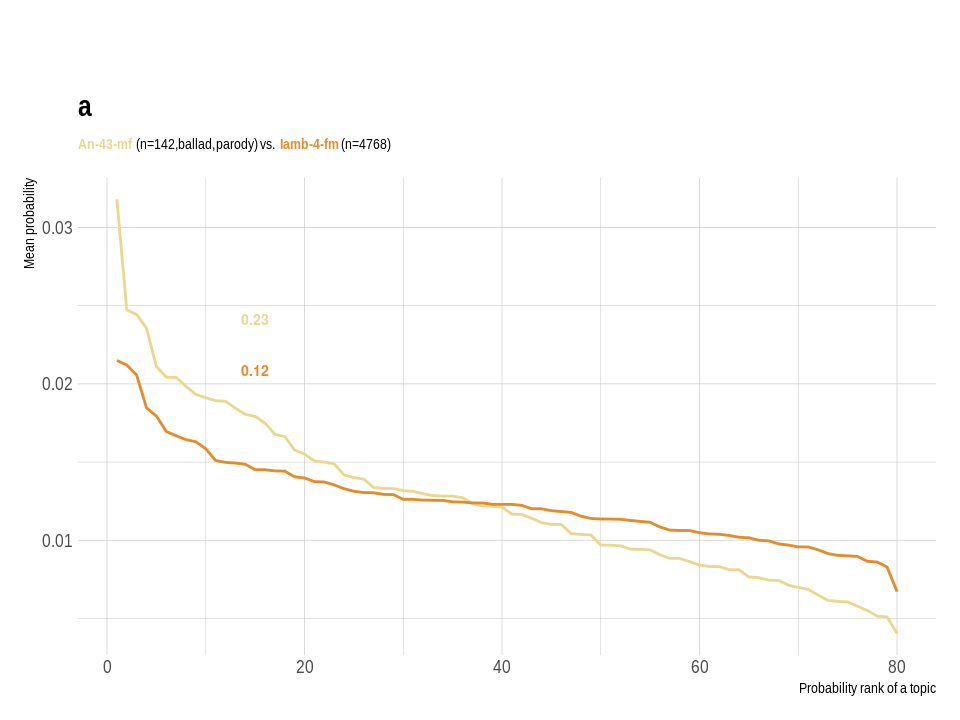

In [10]:
gini_rank = ru_gamma_separated  %>%
    unite("meter", meter:clausula)  %>% 
    filter(meter %in% c("Ан4Ан3_м ж", "Я4_жм"))  %>% 
    group_by(meter, topic)  %>% 
    summarise(m_gamma = mean(gamma))  %>% 
    group_by(meter)  %>% 
    arrange(desc(m_gamma), .by_group=T)  %>% 
    mutate(rank = row_number())  %>% 
    mutate(gini=round(ineq(m_gamma),2))


#### coloring text
cols = paletteer_d("ghibli::MononokeMedium",direction=-1)
cols

#### plot

gini_exm = ggplot(gini_rank, aes(rank, m_gamma, group=meter, color=meter)) + 
    geom_line(size=0.8) + 
    geom_text(data=gini_rank  %>% filter(rank == 10), 
              aes(rank+5,m_gamma+0.005, label=gini),
              size=3,fontface="bold") +
    theme_ipsum() +
    theme(plot.margin = unit(c(4, 1, 1, 1), "lines")) +
    scale_color_paletteer_d("ghibli::MononokeMedium", direction = -1) +
    guides(color=F) +
    labs(title="a",
         subtitle = paste("<b style='color:",
                       cols[1],
                       "'>An-43-mf </b> (n=142,ballad, parody) vs. <b style='color:", 
                       cols[2], 
                       "'>Iamb-4-fm</b> (n=4768)",sep=""),
         y="Mean probability",
         x="Probability rank of a topic") +
    theme(
          plot.subtitle = element_markdown(size=9))

gini_exm

In [30]:

meter_claus_count  %>%  filter(meter %in% c("Ан4Ан3_м ж", "Я4_жм"))

<colors>
#E48C2AFF 

meter,n
<chr>,<int>
Я4_жм,4768
Ан4Ан3_м ж,142


### Gini for all

- take all meters that have at least 10 poems associated with them;  
- calculate gini for everyone;  
- plot log(popularity) x gini  
- expect decrease  

In [12]:
meter_subset = meter_claus_count  %>%
    filter(n > 10)

gini_rank = ru_gamma_separated  %>%
    unite("meter", meter:clausula)  %>%
    right_join(meter_subset, by="meter")  %>% 
    group_by(meter, topic,n)  %>% 
    summarise(m_gamma = mean(gamma))  %>% 
    group_by(meter)  %>% 
    arrange(desc(m_gamma), .by_group=T)  %>% 
    mutate(rank = row_number())  %>% 
    mutate(gini=round(ineq(m_gamma),3))  %>% 
    select(meter, n, gini)  %>% 
    ungroup()  %>% 
    distinct()  %>% 
    left_join(translation, by="meter")

gini_rank

meter,n,gini,meter_eng
<chr>,<int>,<dbl>,<chr>
Ак3_ж,12,0.425,Ак3_f
Ак4_жм,23,0.370,Ак4_fm
"Ак4_ж,м",15,0.440,"Ак4_f,m"
Ан1_д,12,0.579,An1_d
Ан2Ан2_жжм,13,0.447,An22_ffm
Ан2_дм,15,0.405,An2_dm
Ан2_ж,21,0.327,An2_f
Ан2_жм,69,0.234,An2_fm
Ан2_м,63,0.284,An2_m



Call:
lm(formula = log(gini_rank$gini) ~ log(gini_rank$n))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44304 -0.10002 -0.01305  0.08347  0.99784 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.13369    0.03445  -3.881 0.000134 ***
log(gini_rank$n) -0.27835    0.00851 -32.709  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1632 on 241 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8154 
F-statistic:  1070 on 1 and 241 DF,  p-value: < 2.2e-16


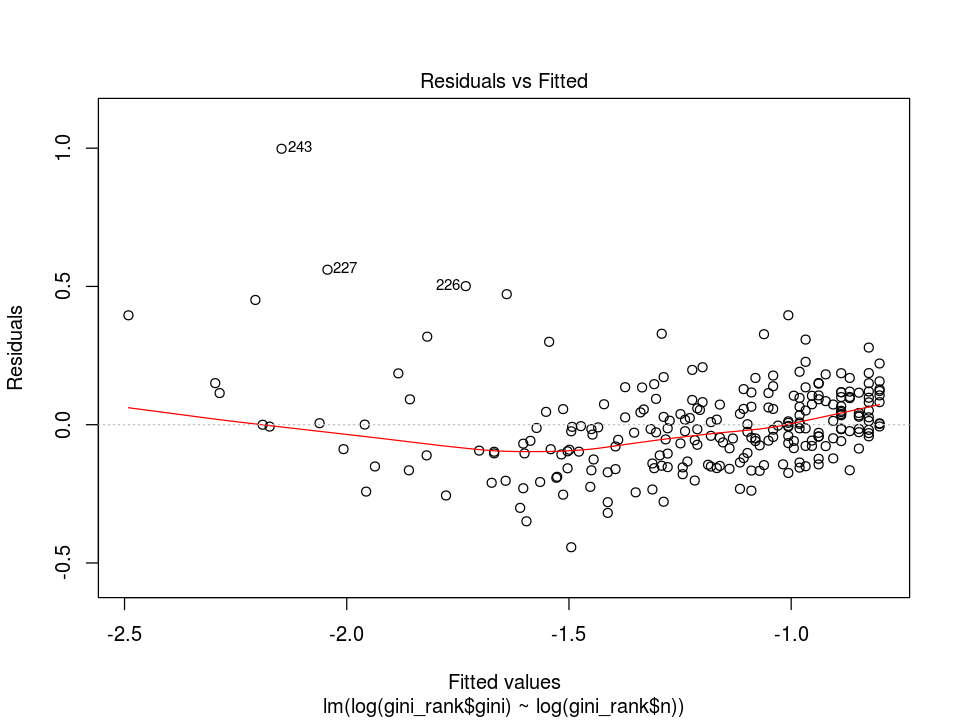

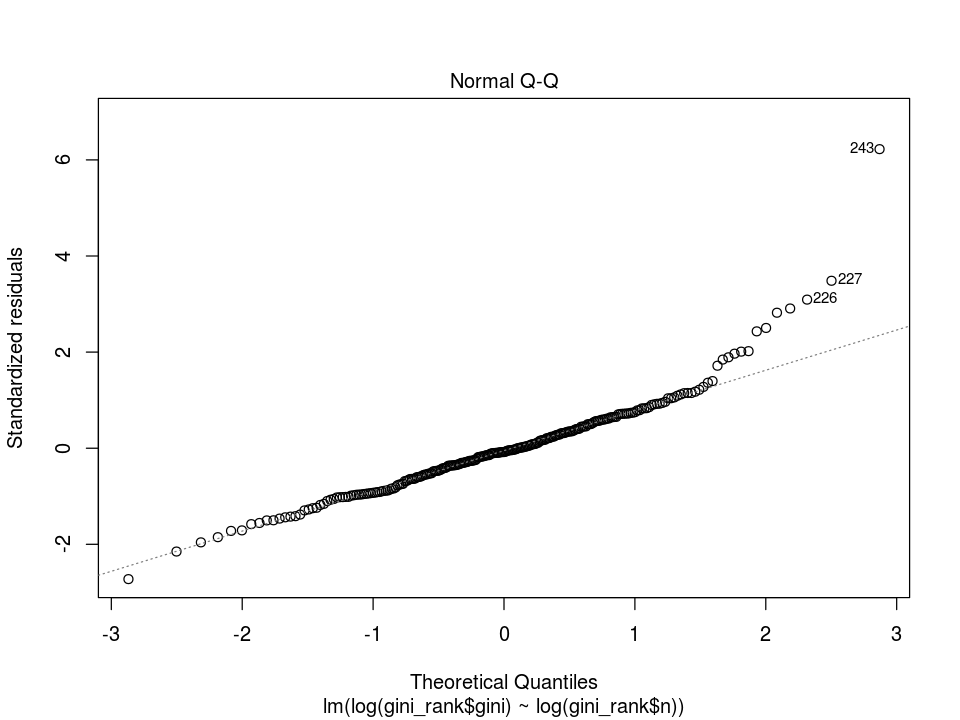

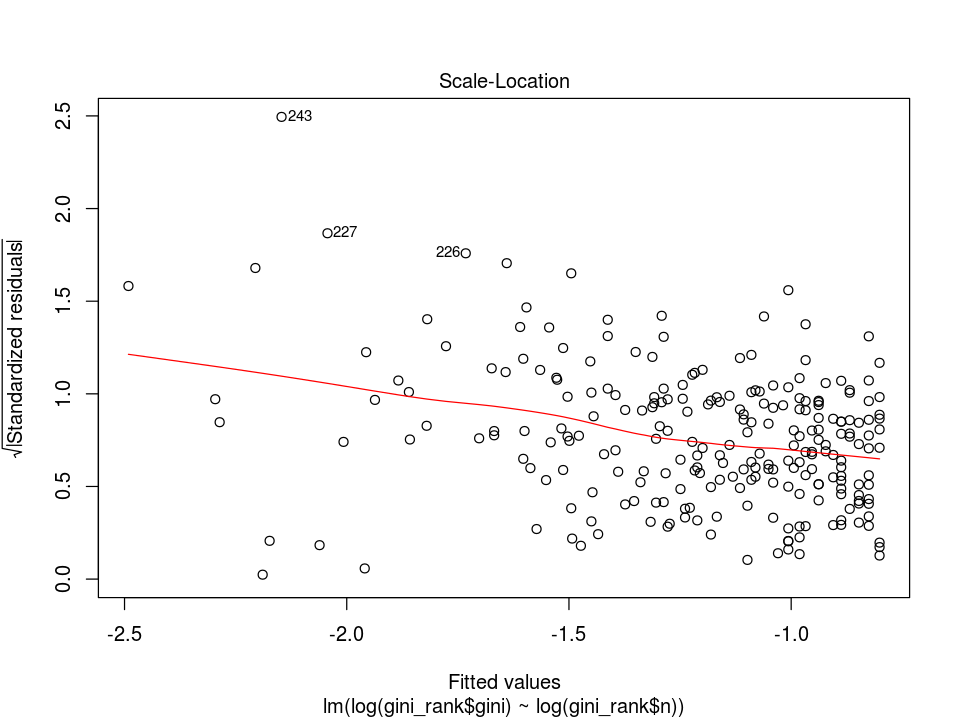

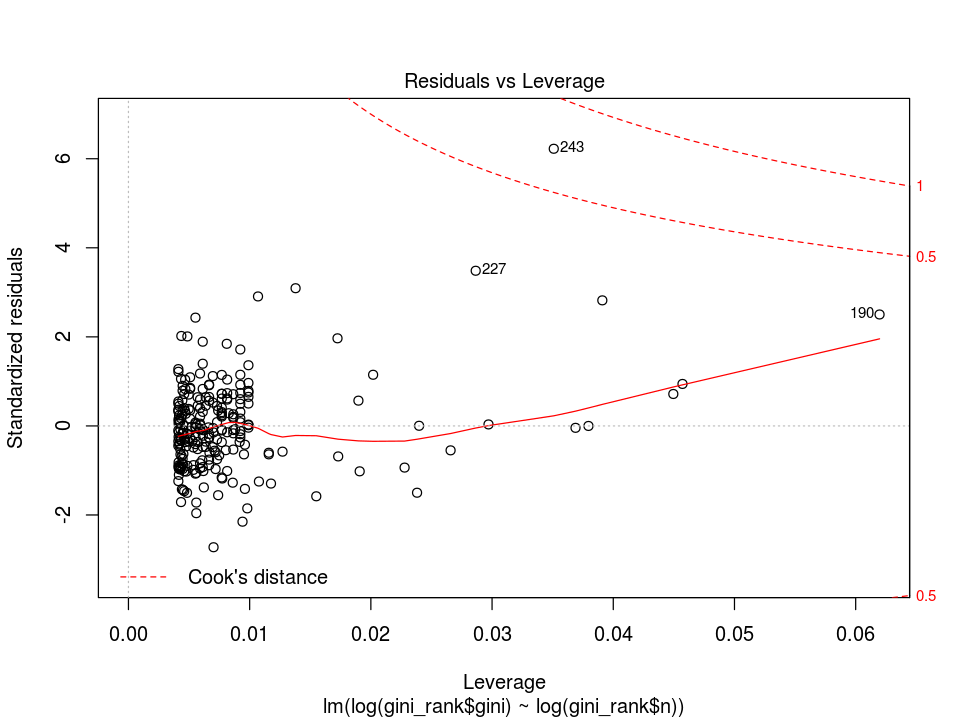

In [13]:
## model

mod = lm(log(gini_rank$gini) ~ log(gini_rank$n))

summary(mod)
plot(mod)



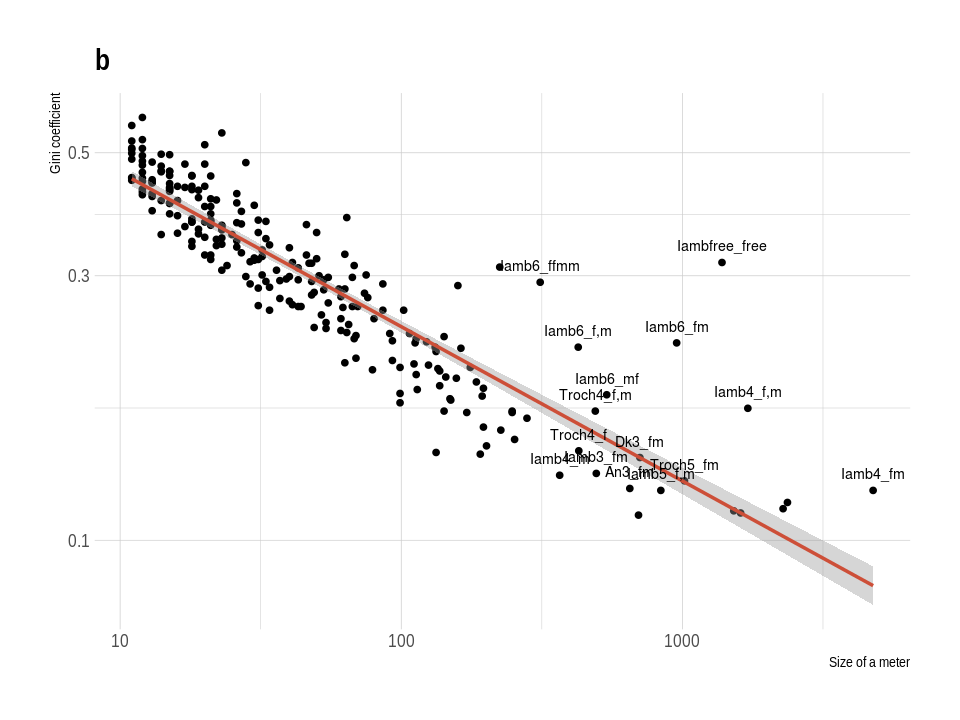

In [14]:
gini_plot  = ggplot(gini_rank, aes(n, gini))  + 
geom_point() +  
geom_smooth(aes(n, gini), method="lm", formula = y ~ x, se=T, color=cols[3]) +
geom_text(data=gini_rank  %>% top_n(20, n)  %>% filter(gini > 0.12), aes(label=meter_eng),vjust=-1, size=3) +
scale_x_log10()  +
scale_y_log10() +
theme_ipsum() +
labs(x="Size of a meter",
     y="Gini coefficient",
     title="b")
gini_plot

## GRAND FINALS  

### Sem. Halo Gini vs. Random Gini. FIGHT

- now we sample poems absolutely randomly, not by meters, only size of the sample matters (and is increased up to 6000)
- at each size step repeat sampling & gini calculation 20 times

In [15]:
## sample random n poems and calculate gini
source("src/gini_redistribute.R")

test1 = gini_redistribute(unique_poems, ru_gamma_separated,
                   vector_of_sizes= unique(gini_rank$n),
                   n_samples=20)



At 1 redistribution. Going strong...

At 2 redistribution. Going strong...

At 3 redistribution. Going strong...

At 4 redistribution. Going strong...

At 5 redistribution. Going strong...

At 6 redistribution. Going strong...

At 7 redistribution. Going strong...

At 8 redistribution. Going strong...

At 9 redistribution. Going strong...

At 10 redistribution. Going strong...

At 11 redistribution. Going strong...

At 12 redistribution. Going strong...

At 13 redistribution. Going strong...

At 14 redistribution. Going strong...

At 15 redistribution. Going strong...

At 16 redistribution. Going strong...

At 17 redistribution. Going strong...

At 18 redistribution. Going strong...

At 19 redistribution. Going strong...

At 20 redistribution. Going strong...



In [49]:
## model

mod = lm(log(test1$gini) ~ log(test1$n))
summary(mod)




Call:
lm(formula = log(test1$gini) ~ log(test1$n))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37065 -0.06524 -0.00003  0.06092  0.45560 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.080824   0.007845    10.3   <2e-16 ***
log(test1$n) -0.386357   0.001635  -236.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1001 on 2218 degrees of freedom
Multiple R-squared:  0.9618,	Adjusted R-squared:  0.9618 
F-statistic: 5.583e+04 on 1 and 2218 DF,  p-value: < 2.2e-16


In [16]:
gini_p = gini_plot + geom_point(data=test1, aes(n, gini, group=n),alpha=0.3,color="grey") + geom_smooth(data=test1, aes(n, gini),method="lm", formula= y ~ x,se=T,color=cols[4])


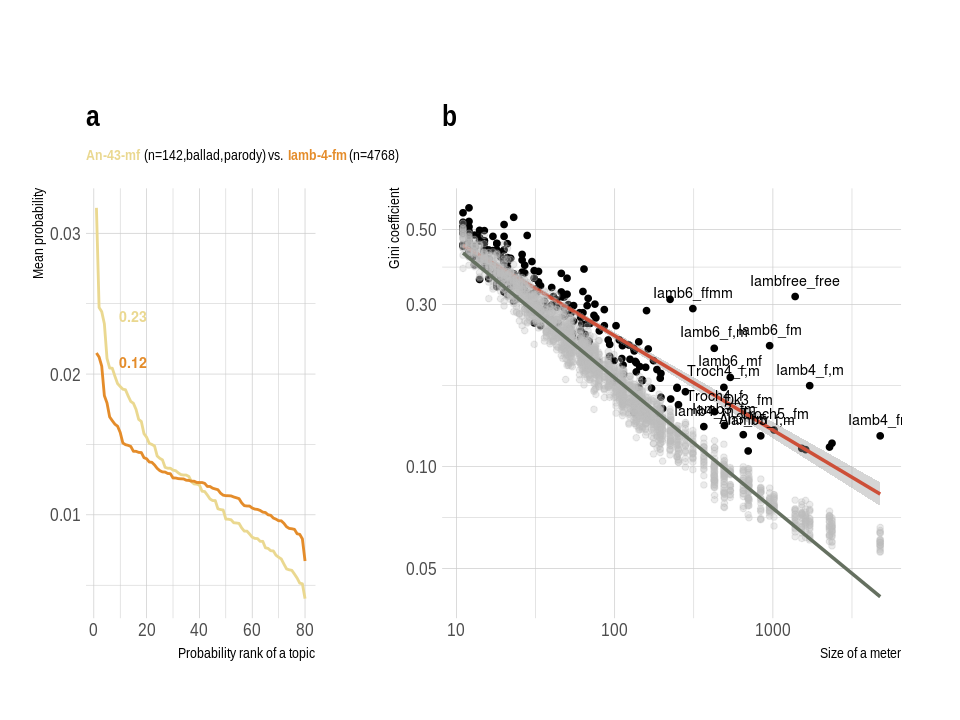

In [17]:
library(patchwork)

layout="
AABBBB
AABBBB
"
gini_exm + gini_p +plot_layout(design=layout)

ggsave("plots/fig4_gini.png", width=8, height=5)